In [301]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# - Separate images in train and test into two groups as DR and nonDR:
# o NonDR : Label 0
# o DR : Label 3 & Label 4 (You donâ€™t need to use Label 1 and Label 2)

image_files = [f for f in os.listdir("Test") if os.path.isfile(os.path.join("Test", f))]

testnonDR = []
testDR = []

for image in image_files:
  label = image.split("-")[1].split('.')[0]
  # nonDR
  if (label == "0"):
    testnonDR.append((os.path.join("Test",image), 0))
  elif (label == "3" or label == "4"):
    testDR.append((os.path.join("Test",image), 1))

image_files = [f for f in os.listdir("Train") if os.path.isfile(os.path.join("Train", f))]

trainnonDR = []
trainDR = []

for image in image_files:
  label = image.split("-")[1].split('.')[0]
  # nonDR
  if (label == "0"):
    trainnonDR.append((os.path.join("Train",image), 0))
  elif (label == "3" or label == "4"):
    trainDR.append((os.path.join("Train",image), 1))


## Montage Train DR

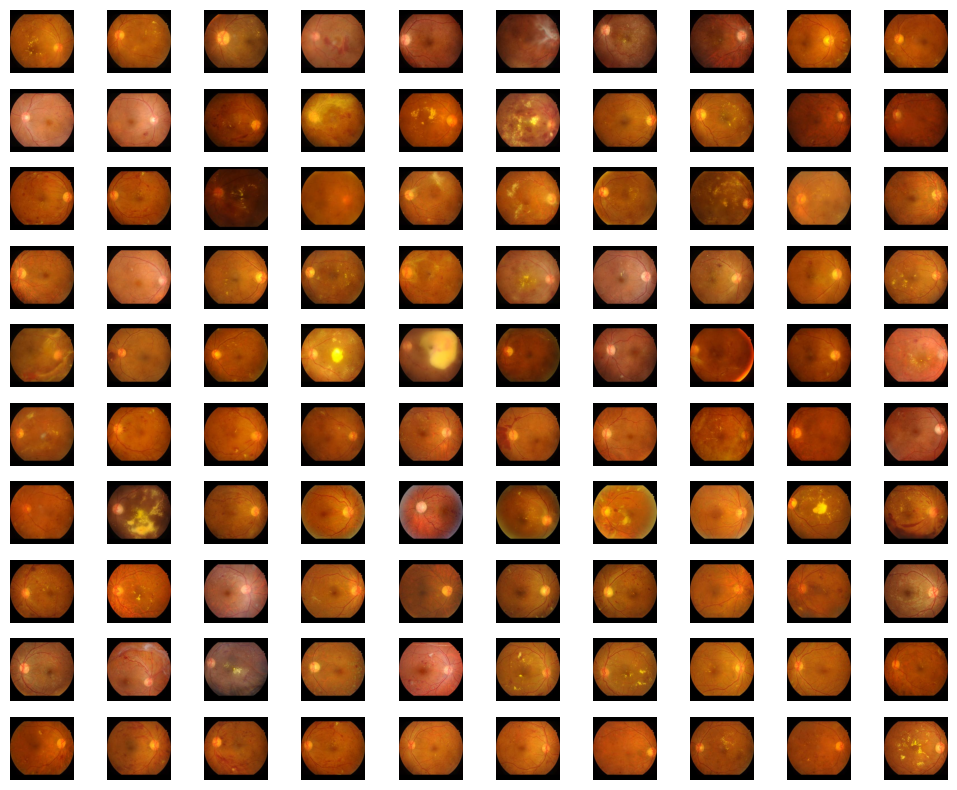

In [302]:
fig, axes = plt.subplots(10, 10, figsize=(10, 8))

for i, ax in enumerate(axes.flat):
  ax.imshow(mpimg.imread(trainDR[i][0]), cmap='gray')
  ax.axis('off')
  
plt.tight_layout()
plt.show()

## Montage Train non DR

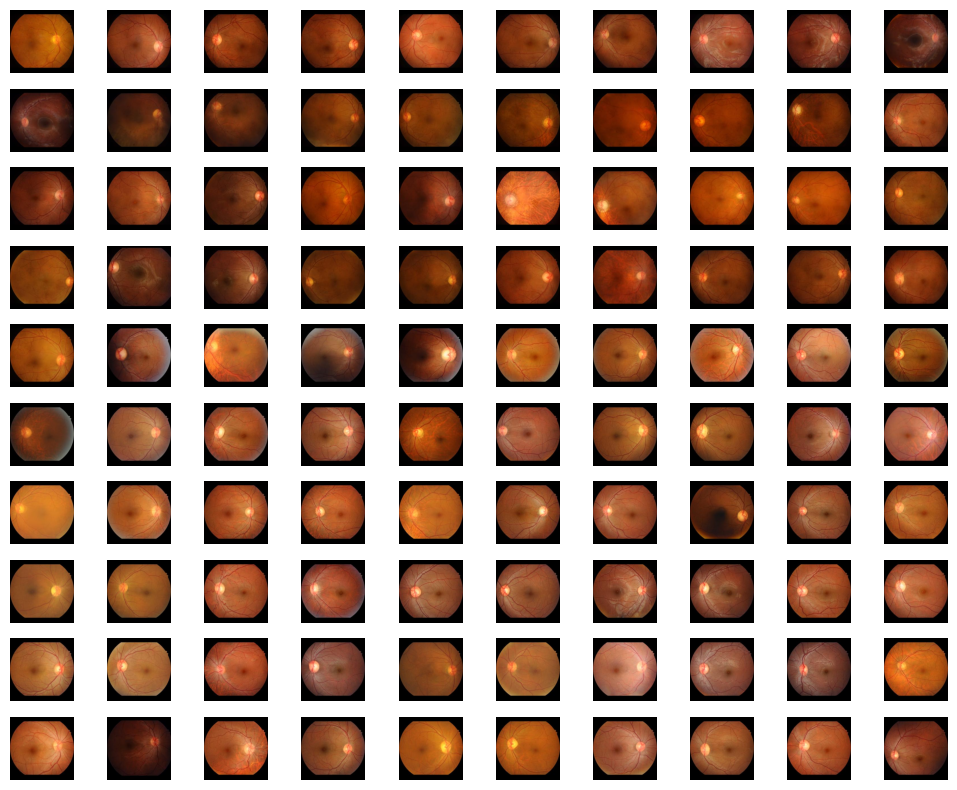

In [303]:
fig, axes = plt.subplots(10, 10, figsize=(10, 8))

for i, ax in enumerate(axes.flat):
  ax.imshow(mpimg.imread(trainnonDR[i][0]), cmap='gray')
  ax.axis('off')

plt.tight_layout()
plt.show()

## Montage Test DR

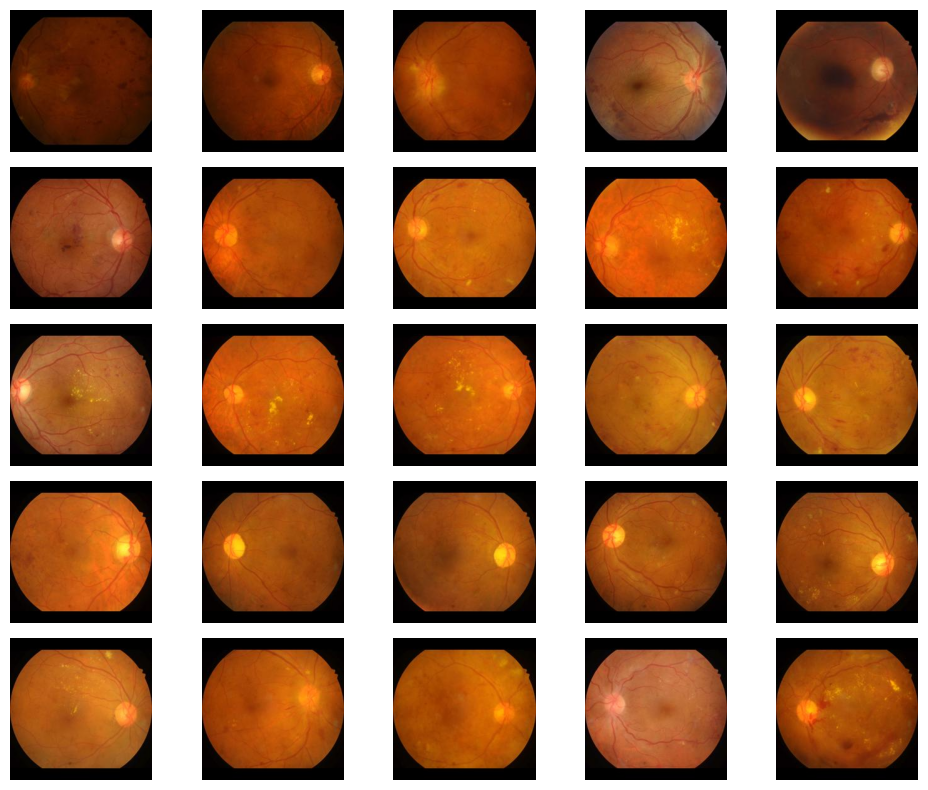

In [304]:
fig, axes = plt.subplots(5, 5, figsize=(10, 8))

for i, ax in enumerate(axes.flat):
  ax.imshow(mpimg.imread(testDR[i][0]), cmap='gray')
  ax.axis('off')

plt.tight_layout()
plt.show()

## Montage Test non Dr

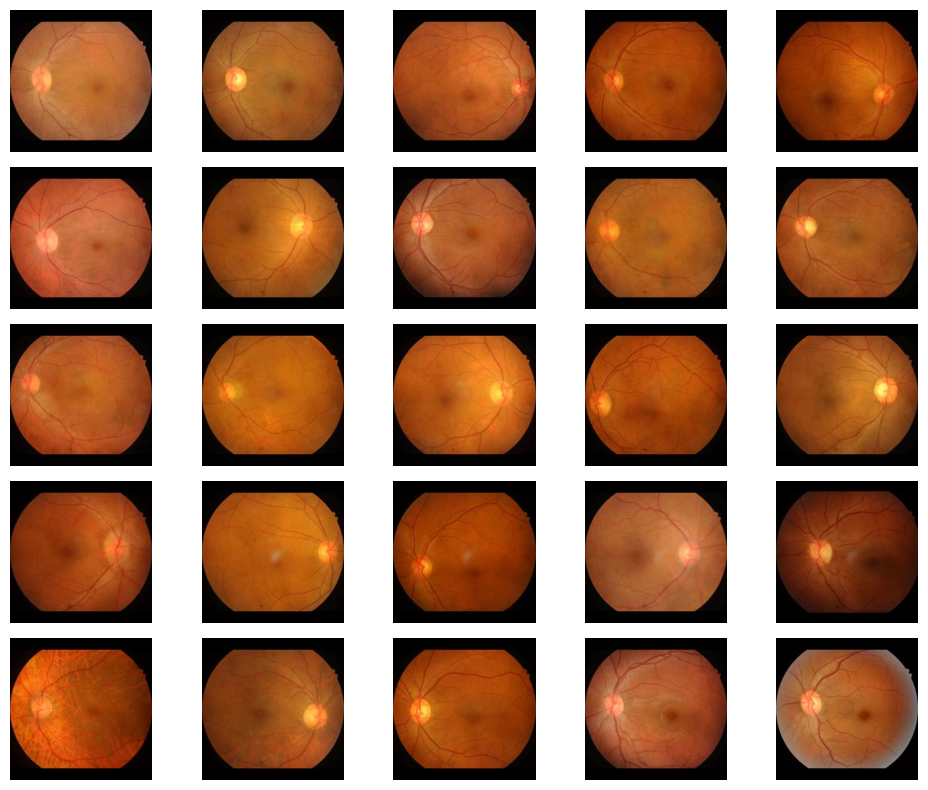

In [305]:
fig, axes = plt.subplots(5, 5, figsize=(10, 8))

for i, ax in enumerate(axes.flat):
  ax.imshow(mpimg.imread(testnonDR[i][0]), cmap='gray')
  ax.axis('off')

plt.tight_layout()
plt.show()

## Merge label 0 and label 3-4


In [306]:
import random

trainSet = trainDR + trainnonDR
random.shuffle(trainSet)

testSet = testDR + testnonDR
random.shuffle(testSet)


## Download Pretained AlexNet from pytorch

In [307]:
import torch
import torchvision.models as models

model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
model.fc = torch.nn.Linear(model.fc.in_features, 2)

In [308]:
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image

transform = transforms.Compose([
  transforms.Resize((224,224)),
  transforms.ToTensor(),
])

for i in range(len(trainSet)):
  img = Image.open(trainSet[i][0])
  img = transform(img)

  trainSet[i] = (img, trainSet[i][1])


In [309]:
for i in range(len(testSet)):
  img = Image.open(testSet[i][0])
  img = transform(img)

  testSet[i] = (img, testSet[i][1])


In [310]:
train_loader = DataLoader(trainSet, batch_size=32, shuffle=True)
test_loader = DataLoader(testSet, batch_size=32, shuffle=True)

## resnet18 0.000001 learning rate 50 epochs 

In [311]:
import torch.optim as optim

criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.00001)

for epoch in range(50):
  model.train()

  running_loss = 0

  for inputs, labels in train_loader:
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

  running_loss += loss.item()

  print(f'Epoch {epoch+1}, Loss: {running_loss/len(trainSet)}')

Epoch 1, Loss: 0.003979040954827335
Epoch 2, Loss: 0.003750155640019517
Epoch 3, Loss: 0.002033684272246602
Epoch 4, Loss: 0.0030683944661329694
Epoch 5, Loss: 0.002543058608756455
Epoch 6, Loss: 0.002931990280225583
Epoch 7, Loss: 0.0028892753189175974
Epoch 8, Loss: 0.003243433594239825
Epoch 9, Loss: 0.003143631530642973
Epoch 10, Loss: 0.0027715327210927287
Epoch 11, Loss: 0.0024575523829181833
Epoch 12, Loss: 0.0023910129580516294
Epoch 13, Loss: 0.0024291942555616803
Epoch 14, Loss: 0.0023222514627508615
Epoch 15, Loss: 0.002478572413151366
Epoch 16, Loss: 0.0033562958008584347
Epoch 17, Loss: 0.003717732568659207
Epoch 18, Loss: 0.0038745278050463486
Epoch 19, Loss: 0.001667392508992889
Epoch 20, Loss: 0.0036924970752998084
Epoch 21, Loss: 0.0013029080188691848
Epoch 22, Loss: 0.0014445296985166082
Epoch 23, Loss: 0.0013958163530446211
Epoch 24, Loss: 0.004078942514115271
Epoch 25, Loss: 0.003914051018800253
Epoch 26, Loss: 0.006035046354805913
Epoch 27, Loss: 0.0012079335836121

In [312]:
model.eval()

correct = 0
total = 0

with torch.no_grad():
  for inputs, label in test_loader:
    outputs = model(inputs)
    _, predicted = torch.max(outputs.data, 1)
    total += len(label)
    print(predicted)
    correct += (predicted == label).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the model on the test images: {accuracy:.2f}%')

tensor([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 1, 0, 0, 1, 1, 0])
tensor([1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1])
tensor([0, 0])
Accuracy of the model on the test images: 87.88%


## resnet18 0.00001 learning rate 50 epochs 

In [316]:
optimizer = optim.Adam(model.parameters(), lr=0.00001)

for epoch in range(100):
  model.train()

  running_loss = 0

  for inputs, labels in train_loader:
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

  running_loss += loss.item()

  print(f'Epoch {epoch+1}, Loss: {running_loss/len(trainSet)}')

model.eval()

correct = 0
total = 0

with torch.no_grad():
  for inputs, label in test_loader:
    outputs = model(inputs)
    _, predicted = torch.max(outputs.data, 1)
    total += len(label)
    print(predicted)
    correct += (predicted == label).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the model on the test images: {accuracy:.2f}%')

Epoch 1, Loss: 1.4564019703969418e-05
Epoch 2, Loss: 0.02399016725413994
Epoch 3, Loss: 1.0454558843478619e-05
Epoch 4, Loss: 1.678524125758776e-05
Epoch 5, Loss: 0.022697567475908925


In [ ]:
optimizer = optim.Adam(model.parameters(), lr=0.0001)

for epoch in range(50):
  model.train()

  running_loss = 0

  for inputs, labels in train_loader:
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

  running_loss += loss.item()

  print(f'Epoch {epoch+1}, Loss: {running_loss/len(trainSet)}')

model.eval()

correct = 0
total = 0

with torch.no_grad():
  for inputs, label in test_loader:
    outputs = model(inputs)
    _, predicted = torch.max(outputs.data, 1)
    total += len(label)
    print(predicted)
    correct += (predicted == label).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the model on the test images: {accuracy:.2f}%')